# Empezemos

## 1. Importar Hyperspy

Como cualquier otra libreria lo que primero debes hacer es importarla

    import hyperspy.api as hs
    
Sin embargo, para poder hacer graficas interactivas se debe activar esa funcion. 

Usualmente, se usan estos backends
- `notebook` (Jupyter Notebook )
- `qt`
- `widget` (Solamente Jupyter Lab and Notebook).

Con los backends 'notebook' y 'widget', la figura se incrustará dentro del notebook,
mientras que con otros backends ('qt' o 'tk'), la figura se mostrará en ventanas separadas fuera del notebook.

In [149]:
%matplotlib widget 
import hyperspy.api as hs
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,6)

## 2. Obtener ayuda
La documentacion de Hyperspy incluye

* La [guia](http://hyperspy.org/hyperspy-doc/current/index.html)
* Las [demos](http://nbviewer.jupyter.org/github/hyperspy/hyperspy-demos/tree/master/) como este.
* El [gitter chat](https://gitter.im/hyperspy/hyperspy)  
### Docstrings
En Python, la mayoría de los objetos incluyen su propia documentación  
(*docstring* en la jerga de Python).  

En el **Jupyter Notebook** puedes consultar la documentación de forma interactiva de las siguientes maneras:

- Añadiendo un signo de interrogación al objeto, por ejemplo: load?

In [150]:
hs?

Type:        module
String form: <module 'hyperspy.api' from 'c:\\Users\\dreye\\anaconda3\\Lib\\site-packages\\hyperspy\\api.py'>
File:        c:\users\dreye\anaconda3\lib\site-packages\hyperspy\api.py
Docstring:  
All public packages, functions and classes are available in this module.

When starting HyperSpy using the ``hyperspy`` script (e.g. by executing
``hyperspy`` in a console, using the context menu entries or using the links in
the ``Start Menu``, the :mod:`~hyperspy.api` package is imported in the user
namespace as ``hs``, i.e. by executing the following:

    >>> import hyperspy.api as hs


(Note that code snippets are indicated by three greater-than signs)

We recommend to import the HyperSpy API as above also when doing it manually.
The docstring examples assume that ``hyperspy.api`` has been imported as ``hs``,
``numpy`` as ``np`` and ``matplotlib.pyplot`` as ``plt``. 

Functions:

    :func:`~.api.get_configuration_directory_path`
        Return the configuration directo

La funcion `dir` es bastante util para inspeccionar atributos de objetos python

In [84]:
dir(hs)

['__version__',
 'data',
 'get_configuration_directory_path',
 'interactive',
 'load',
 'model',
 'plot',
 'preferences',
 'print_known_signal_types',
 'roi',
 'samfire',
 'set_log_level',
 'signals',
 'stack',
 'transpose']

## 3. Structure overview

HyperSpy proporciona:

* Una colección de "señales" que son contenedores de datos especializados con funciones(métodos en la jerga de Python) que operan sobre los datos. Se pueden encontrar en ``hs.signals``.
* Funciones que operan en las señales. Por ejemplo ``hs.stack`` para juntar señales

In [151]:
#Verificar los atributos de hs.signals
dir(hs.signals)

['BaseSignal',
 'ComplexSignal',
 'ComplexSignal1D',
 'ComplexSignal2D',
 'Signal1D',
 'Signal2D']

In [152]:
#Importamos un archivo comprimido que contiene base de datos
from urllib.request import urlretrieve, urlopen
from zipfile import ZipFile
files = urlretrieve("https://www.dropbox.com/s/s7cx92mfh2zvt3x/""HyperSpy_demos_EDX_SEM_files.zip?raw=1","./HyperSpy_demos_EDX_SEM_files.zip")
with ZipFile("HyperSpy_demos_EDX_SEM_files.zip") as z:
   z.extractall()

In [153]:
#Lo almacenamos en una variable
s = hs.load("Ni_superalloy_1pix.msa")

WARNING | Hyperspy | `signal_type='EDS'` not understood. See `hs.print_known_signal_types()` for a list of installed signal types or https://github.com/hyperspy/hyperspy-extensions-list for the list of all hyperspy extensions providing signals. (hyperspy.io:744)


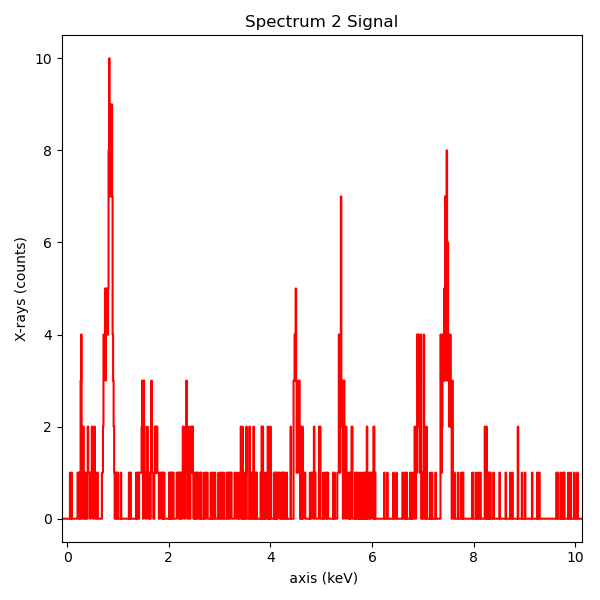

In [154]:

s.plot()

In [155]:
#veamos el tipo de señal
s

<Signal1D, title: Spectrum 2, dimensions: (|1024)>

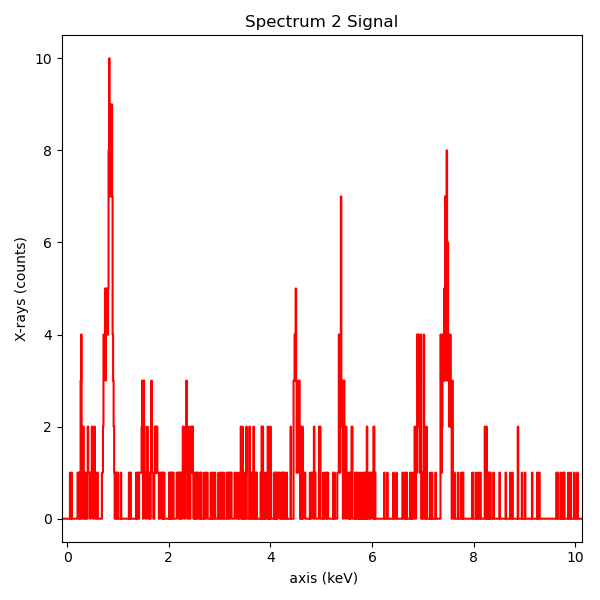

In [156]:
#Asignamos el tipo de señal correcta
s.set_signal_type("EDS_SEM")
s.plot()

In [157]:
s

<EDSSEMSpectrum, title: Spectrum 2, dimensions: (|1024)>

In [158]:
#Metadata del archivo
s.metadata.Acquisition_instrument.SEM

├── Detector
│   └── EDS
│       ├── azimuth_angle = 63.0
│       ├── elevation_angle = 35.0
│       ├── energy_resolution_MnKa = 130.0
│       ├── live_time = 0.006855
│       └── real_time = 0.0
├── Stage
│   └── tilt_alpha = 38.0
├── beam_current = 0.0
└── beam_energy = 15.0

In [161]:
#Uno tambien puede setear los parametros de manera directa
s.metadata.Acquisition_instrument.SEM.beam_energy = 5
s.metadata.Acquisition_instrument.SEM

├── Detector
│   └── EDS
│       ├── azimuth_angle = 63.0
│       ├── elevation_angle = 35.0
│       ├── energy_resolution_MnKa = 130.0
│       ├── live_time = 0.006855
│       └── real_time = 0.0
├── Stage
│   └── tilt_alpha = 38.0
├── beam_current = 0.0
└── beam_energy = 5

In [162]:
#Tambien se puede usar el metodo set_microscope_parameters
s.set_microscope_parameters(beam_energy = 100)
s.metadata.Acquisition_instrument.SEM

├── Detector
│   └── EDS
│       ├── azimuth_angle = 63.0
│       ├── elevation_angle = 35.0
│       ├── energy_resolution_MnKa = 130.0
│       ├── live_time = 0.006855
│       └── real_time = 0.0
├── Stage
│   └── tilt_alpha = 38.0
├── beam_current = 0.0
└── beam_energy = 100

In [163]:
#Tambien se puede hacer con interfaz grafica de usuario
s.set_microscope_parameters()

In [164]:
s.metadata.Acquisition_instrument.SEM

├── Detector
│   └── EDS
│       ├── azimuth_angle = 63.0
│       ├── elevation_angle = 35.0
│       ├── energy_resolution_MnKa = 130.0
│       ├── live_time = 0.006855
│       └── real_time = 0.0
├── Stage
│   └── tilt_alpha = 38.0
├── beam_current = 0.0
└── beam_energy = 200.0

In [165]:
#Manejo de los ejes
si = hs.load("Ni_superalloy_010.rpl",signal_type="EDS_TEM").as_signal1D(0)
si.axes_manager

<Axes manager, axes: (256, 224|1024)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
           width |    256 |      0 |       0 |       1 |        
          height |    224 |      0 |       0 |       1 |        
---------------- | ------ | ------ | ------- | ------- | ------ 
           depth |   1024 |      0 |       0 |       1 |

In [166]:
#Vamos a cambiar 
si.axes_manager[-1].name = 'E'
si.axes_manager['E'].units = 'J'
si.axes_manager['E'].scale = 0.01
si.axes_manager

<Axes manager, axes: (256, 224|1024)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
           width |    256 |      0 |       0 |       1 |        
          height |    224 |      0 |       0 |       1 |        
---------------- | ------ | ------ | ------- | ------- | ------ 
               E |   1024 |      0 |       0 |    0.01 |      J

In [170]:
#Verificacion de la escala
aaa=si.isig[0.12]

In [171]:
aaa

<BaseSignal, title: , dimensions: (256, 224|)>

In [172]:
aaa.data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [173]:
#Interfaz grafica
si.axes_manager.gui()

In [175]:
si.axes_manager

<Axes manager, axes: (256, 224|1024)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
           width |    256 |      0 |       0 |       1 |        
          height |    224 |      0 |       0 |       1 |        
---------------- | ------ | ------ | ------- | ------- | ------ 
               E |   1024 |      0 |       0 |     0.1 |     eV

## 4. Cargar data de un archivo

La forma en la que se carga la data es usando `hs.load` y se asigna a una variable comunmente s

La data usada ahora es un ejemplo de un espectro EELS- ver [Azough *et al.* Inorg. Chem. (2016) 55 (7), pp 3338]( https://pubs.acs.org/doi/10.1021/acs.inorgchem.5b02594).

In [176]:
s = hs.load('005_EELS_SI_ap2_full range (dark ref corrected).dm3')

Veamos que hay en su interior

In [177]:
s

<EELSSpectrum, title: 005_EELS_SI_ap2_full range (dark ref corrected), dimensions: (65, 79|1340)>

Hyperspy ha guardado la data en el objeto `EELSSpectrum` que hemos guardado en la variable `s`. El simbolo `|` separa las dimensiones de navegacion *x*,*y* y la dimension de la señal, en este caso *energy loss*. Esta distincion entre dimensiones y navegacion en importante.

La metadata leida del archivo es guardada en el atributo `original_metadata`. En este caso, ese es lo que uno encontraria si examina el `tag structure` del archivo usando DigitalMicrograph.

In [103]:
# Display the original metadata: 
s.original_metadata

├── ApplicationBounds = (0, 0, 1375, 2560)
├── DocumentObjectList
│   └── TagGroup0
│       ├── AnnotationGroupList
│       │   └── TagGroup0
│       │       ├── AnnotationType = 23
│       │       ├── BackgroundColor = (-1, -1, -1)
│       │       ├── BackgroundMode = 2
│       │       ├── Color = (-258, 0, 0)
│       │       ├── FillMode = 2
│       │       ├── ForegroundColor = (-1, -32640, 16448)
│       │       ├── HasBackground = 0
│       │       ├── IsDeletable = 1
│       │       ├── IsMoveable = 1
│       │       ├── IsResizable = 1
│       │       ├── IsSelectable = 1
│       │       ├── IsTranslatable = 1
│       │       ├── IsVisible = 1
│       │       ├── IsVolatile = 0
│       │       ├── Label = 1
│       │       ├── Name = SICursor
│       │       ├── ObjectTags
│       │       ├── Rectangle = (7.0, 16.0, 27.0, 37.0)
│       │       ├── SelectionStyle = 1
│       │       └── UniqueID = 11
│       ├── AnnotationType = 20
│       ├── BackgroundColor = (-1, -1, -1)
│       ├── BackgroundMode = 2
│       ├── FillMode = 1
│       ├── ForegroundColor = (-1, -32640, 16448)
│       ├── HasBackground = 0
│       ├── ImageDisplayInfo
│       │   ├── BrightColor = (-1, -1, -1)
│       │   ├── Brightness = 0.5
│       │   ├── CLUT <list>
│       │   │   ╠══ [0] = (0, 0, 0)
│       │   │   ╠══ [1] = (257, 257, 257)
│       │   │   ╠══ [10] = (2570, 2570, 2570)
│       │   │   ╠══ [100] = (25700, 25700, 25700)
│       │   │   ╠══ [101] = (25957, 25957, 25957)
│       │   │   ╠══ [102] = (26214, 26214, 26214)
│       │   │   ╠══ [103] = (26471, 26471, 26471)
│       │   │   ╠══ [104] = (26728, 26728, 26728)
│       │   │   ╠══ [105] = (26985, 26985, 26985)
│       │   │   ╠══ [106] = (27242, 27242, 27242)
│       │   │   ╠══ [107] = (27499, 27499, 27499)
│       │   │   ╠══ [108] = (27756, 27756, 27756)
│       │   │   ╠══ [109] = (28013, 28013, 28013)
│       │   │   ╠══ [11] = (2827, 2827, 2827)
│       │   │   ╠══ [110] = (28270, 28270, 28270)
│       │   │   ╠══ [111] = (28527, 28527, 28527)
│       │   │   ╠══ [112] = (28784, 28784, 28784)
│       │   │   ╠══ [113] = (29041, 29041, 29041)
│       │   │   ╠══ [114] = (29298, 29298, 29298)
│       │   │   ╠══ [115] = (29555, 29555, 29555)
│       │   │   ╠══ [116] = (29812, 29812, 29812)
│       │   │   ╠══ [117] = (30069, 30069, 30069)
│       │   │   ╠══ [118] = (30326, 30326, 30326)
│       │   │   ╠══ [119] = (30583, 30583, 30583)
│       │   │   ╠══ [12] = (3084, 3084, 3084)
│       │   │   ╠══ [120] = (30840, 30840, 30840)
│       │   │   ╠══ [121] = (31097, 31097, 31097)
│       │   │   ╠══ [122] = (31354, 31354, 31354)
│       │   │   ╠══ [123] = (31611, 31611, 31611)
│       │   │   ╠══ [124] = (31868, 31868, 31868)
│       │   │   ╠══ [125] = (32125, 32125, 32125)
│       │   │   ╠══ [126] = (32382, 32382, 32382)
│       │   │   ╠══ [127] = (32639, 32639, 32639)
│       │   │   ╠══ [128] = (-32640, -32640, -32640)
│       │   │   ╠══ [129] = (-32383, -32383, -32383)
│       │   │   ╠══ [13] = (3341, 3341, 3341)
│       │   │   ╠══ [130] = (-32126, -32126, -32126)
│       │   │   ╠══ [131] = (-31869, -31869, -31869)
│       │   │   ╠══ [132] = (-31612, -31612, -31612)
│       │   │   ╠══ [133] = (-31355, -31355, -31355)
│       │   │   ╠══ [134] = (-31098, -31098, -31098)
│       │   │   ╠══ [135] = (-30841, -30841, -30841)
│       │   │   ╠══ [136] = (-30584, -30584, -30584)
│       │   │   ╠══ [137] = (-30327, -30327, -30327)
│       │   │   ╠══ [138] = (-30070, -30070, -30070)
│       │   │   ╠══ [139] = (-29813, -29813, -29813)
│       │   │   ╠══ [14] = (3598, 3598, 3598)
│       │   │   ╠══ [140] = (-29556, -29556, -29556)
│       │   │   ╠══ [141] = (-29299, -29299, -29299)
│       │   │   ╠══ [142] = (-29042, -29042, -29042)
│       │   │   ╠══ [143] = (-28785, -28785, -28785)
│       │   │   ╠══ [144] = (-28528, -28528, -28528)
│       │   │   ╠══ [145] = (-28271, -28271, -28271)
│       │   │   ╠══ [146] = (-28014, -28014, -28014)
│       │   │   ╠══ [

Parte de esta informacion se guarda en la `metadata`. Hyperspy solo usa la metada cuando va hacer alguna operacion, pero la metada original se guarda en `original_metadata`.

In [178]:
# Display the metadata: 
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       ├── collection_angle = 37.0
│       │       ├── dwell_time = 0.05000000074505806
│       │       └── frame_number = 1
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 100.0
│       ├── camera_length = 1000.0
│       ├── convergence_angle = 32.0
│       ├── magnification = 1.0
│       └── microscope = None
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.2.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2025-08-16T17:31:41.172184-05:00
│   ├── date = 2014-06-29
│   ├── original_filename = 005_EELS_SI_ap2_full range (dark ref corrected).dm3
│   ├── time = 16:16:56
│   └── title = 005_EELS_SI_ap2_full range (dark ref corrected)
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity (Counts)
    └── signal_type = EELS

La metadat se puede modificar facilmente

In [180]:
s.metadata.Acquisition_instrument.TEM.convergence_angle = 80
s.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       ├── collection_angle = 37.0
│       │       ├── dwell_time = 0.05000000074505806
│       │       └── frame_number = 1
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 100.0
│       ├── camera_length = 1000.0
│       ├── convergence_angle = 80
│       ├── magnification = 1.0
│       └── microscope = None
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 2.2.0
│   │       ├── io_plugin = rsciio.digitalmicrograph
│   │       ├── operation = load
│   │       └── timestamp = 2025-08-16T17:31:41.172184-05:00
│   ├── date = 2014-06-29
│   ├── original_filename = 005_EELS_SI_ap2_full range (dark ref corrected).dm3
│   ├── time = 16:16:56
│   └── title = 005_EELS_SI_ap2_full range (dark ref corrected)
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── quantity = Intensity (Counts)
    └── signal_type = EELS

## 5. Propiedades de los ejes
Los ejes para cada señal(*x*,*y*,*energy Loss*) son guardados en el atributo `axes manager`


In [106]:
s.axes_manager

<Axes manager, axes: (65, 79|1340)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
               x |     65 |      0 |      -0 |   0.047 |     nm 
               y |     79 |      0 |      -0 |   0.047 |     nm 
---------------- | ------ | ------ | ------- | ------- | ------ 
     Energy loss |   1340 |      0 | 2.8e+02 |     0.7 |     eV

Hyperspy distingue bastante bien cuales son los ejes de navgeacion y de señal. La mayoria de las funciones operan en las señales e iteran en los ejes de navegacion

Con axes manager podemos acceder a los ejes y modificarlo

In [182]:
s.axes_manager[0]

<x axis, size: 65, index: 0>

In [183]:
s.axes_manager['Energy loss']

<Energy loss axis, size: 1340>

In [184]:
s.axes_manager['Energy loss'].scale

0.699999988079071

In [110]:
s.axes_manager['Energy loss'].units

'eV'

## 6. Visualizacion

In [111]:
# Plot
s.plot()

la letra `e` para usar un segundo pointer

## 7. Cambiando ejes de navegacion y señal

Podemos cambiar la forma en que Hyperspy ve la señal al convertir `EELSSpectrum` a `Signal2D`

In [185]:
im = s.to_signal2D()
im

<Signal2D, title: 005_EELS_SI_ap2_full range (dark ref corrected), dimensions: (1340|65, 79)>

Ahora podemos visualizar la data en funcion de la energia

In [187]:
im.plot()

## Atomap

In [188]:
import atomap.api as am
import numpy as np
import atomap.dummy_data as dummy_data

Lo primero que vamos hacer es obtener una señal

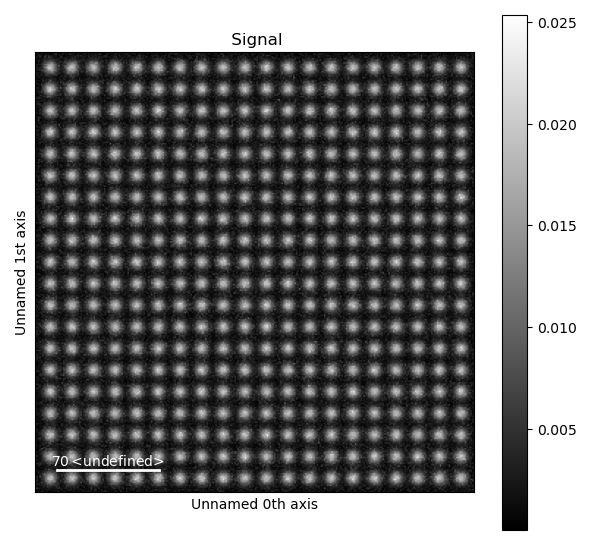

<Signal2D, title: , dimensions: (|300, 300)>

In [189]:
s = dummy_data.get_simple_cubic_signal(image_noise=True)
s.plot()
s

Ahora vamos a tratar de ubicar la posicion de los atomos

In [190]:
s_peaks = am.get_feature_separation(s, separation_range=(2, 20))


  0%|          | 0/18 [00:00<?, ?it/s]

[########################################] | 100% Completed | 229.84 ms


Veamos que tipo de dato es s_peaks

In [191]:
s_peaks

<Signal2D, title: Stack of , dimensions: (18|300, 300)>

Ploteomos s_peaks

In [117]:
s_peaks.plot()

Entonces el valor correcto es 7

Ahora ubiquemos las posiciones de los atomos

In [192]:
atom_positions=am.get_atom_positions(s,separation=7)

Inspecciones qué es `atom_positions`

In [193]:
atom_positions

array([[158, 261],
       [ 25, 113],
       [260, 172],
       [245, 291],
       [ 84,  54],
       [158,  39],
       [290,  99],
       [246, 143],
       [202, 260],
       [128, 260],
       [290, 113],
       [112, 113],
       [143, 276],
       [260, 276],
       [ 68,  10],
       [290, 201],
       [ 39,  54],
       [157, 172],
       [ 98, 290],
       [143,  69],
       [ 39, 157],
       [ 84,  39],
       [216, 245],
       [232, 290],
       [ 83, 216],
       [217, 173],
       [127, 114],
       [157,   9],
       [ 10,  25],
       [274, 128],
       [275, 245],
       [ 68, 173],
       [143, 187],
       [216, 291],
       [ 24,  24],
       [187,  99],
       [100,  53],
       [230, 216],
       [246,  55],
       [262,  98],
       [245, 274],
       [158, 186],
       [215, 143],
       [217, 231],
       [ 68, 291],
       [231, 157],
       [231,  10],
       [ 39, 142],
       [201, 142],
       [ 84, 275],
       [ 54, 113],
       [128, 291],
       [113,

Ahora vamos a crear un objeto `sublattice`

In [121]:
sublattice=am.Sublattice(atom_positions,image=s.data)
sublattice

<Sublattice,  (atoms:400,planes:0)>

Ahora vamos a refinar  los puntos

In [194]:
sublattice.find_nearest_neighbors()
sublattice.refine_atom_positions_using_center_of_mass()
sublattice.refine_atom_positions_using_2d_gaussian()

Center of mass:   0%|          | 0/400 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/400 [00:00<?, ?it/s]

Ploteamos las nuevas ubicaciones

In [195]:
sublattice.get_position_history().plot()

Ahora extraemos las posiciones de los atomos

In [196]:
atom_list=sublattice.atom_list
atom_list

[<Atom_Position,  (x:83.7,y:54.3,sx:2.5,sy:2.4,r:2.7,e:1.0)>,
 <Atom_Position,  (x:290.0,y:98.6,sx:2.6,sy:2.5,r:0.4,e:1.1)>,
 <Atom_Position,  (x:275.3,y:68.9,sx:2.5,sy:2.5,r:2.4,e:1.0)>,
 <Atom_Position,  (x:157.2,y:39.6,sx:2.5,sy:2.4,r:2.4,e:1.1)>,
 <Atom_Position,  (x:172.1,y:231.0,sx:2.6,sy:2.7,r:2.9,e:1.1)>,
 <Atom_Position,  (x:157.3,y:9.9,sx:2.5,sy:2.6,r:0.4,e:1.0)>,
 <Atom_Position,  (x:10.1,y:231.1,sx:2.7,sy:2.5,r:2.5,e:1.0)>,
 <Atom_Position,  (x:127.9,y:54.3,sx:2.6,sy:2.8,r:2.3,e:1.1)>,
 <Atom_Position,  (x:216.4,y:172.1,sx:2.5,sy:2.4,r:2.8,e:1.0)>,
 <Atom_Position,  (x:142.8,y:216.3,sx:2.6,sy:2.6,r:2.5,e:1.0)>,
 <Atom_Position,  (x:142.6,y:201.6,sx:2.6,sy:2.6,r:1.1,e:1.0)>,
 <Atom_Position,  (x:245.8,y:128.0,sx:2.6,sy:2.7,r:0.3,e:1.1)>,
 <Atom_Position,  (x:186.9,y:54.3,sx:2.6,sy:2.6,r:2.8,e:1.0)>,
 <Atom_Position,  (x:231.1,y:83.6,sx:2.4,sy:2.5,r:2.4,e:1.0)>,
 <Atom_Position,  (x:245.8,y:172.1,sx:2.6,sy:2.5,r:0.4,e:1.0)>,
 <Atom_Position,  (x:187.0,y:142.7,sx:2.5,sy:2.6,r:

Construimos los planos cristalograficos

In [197]:
sublattice.construct_zone_axes()

Ploteamos

In [201]:
sublattice.plot_planes()

## Imagen con mas de 1 sublattice

Creamos una imagen con mas de 1 sublattice

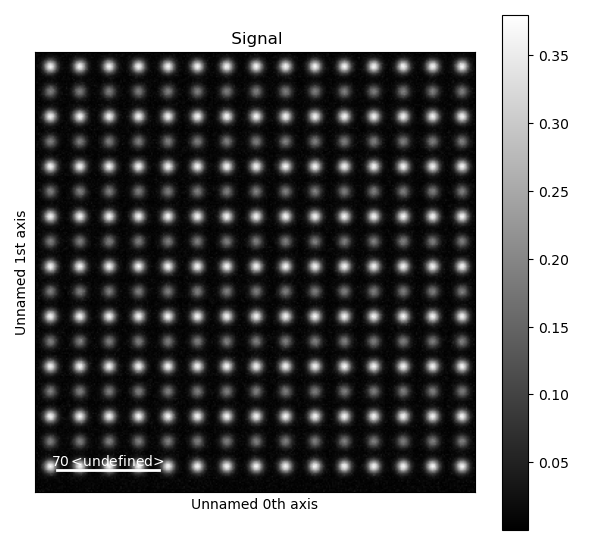

<Signal2D, title: , dimensions: (|300, 300)>

In [202]:
s = dummy_data.get_two_sublattice_signal()
s.plot()
s

Ahora realizamos el mismo procedimiento que hicimos anterioremente

Center of mass:   0%|          | 0/104 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/104 [00:00<?, ?it/s]

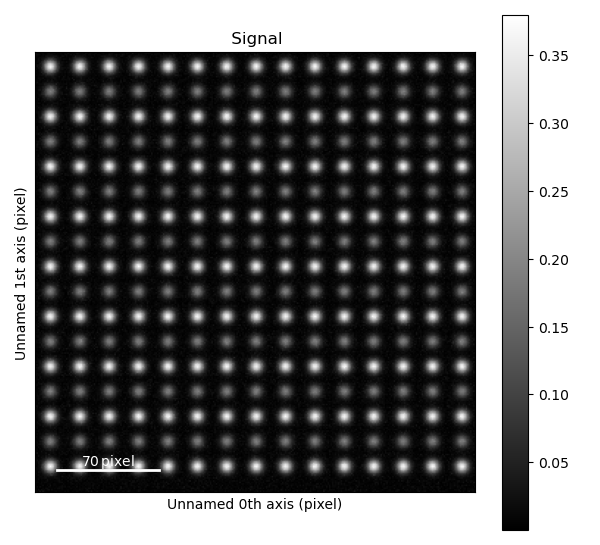

In [203]:
A_positions = am.get_atom_positions(s, separation=15)
sublattice_A = am.Sublattice(A_positions, image=s.data, color='r')
sublattice_A.find_nearest_neighbors()
sublattice_A.refine_atom_positions_using_center_of_mass()
sublattice_A.refine_atom_positions_using_2d_gaussian()
sublattice_A.construct_zone_axes()
sublattice_A.plot()
sublattice_A.plot_planes()

In [129]:
#Agora identificamos el eje de zona de intere
zone_axis_001 = sublattice_A.zones_axis_average_distances[1]

Una vez que identificamos el eje, podemos indicar la segunda sublaticce teniendo en cuenta que son los atomos intermedios

In [130]:
B_positions = sublattice_A.find_missing_atoms_from_zone_vector(zone_axis_001)

Ahora a la imagen original le vamos a quitar los atomos ya identificados 

In [131]:
from atomap.tools import remove_atoms_from_image_using_2d_gaussian
image_without_A = remove_atoms_from_image_using_2d_gaussian(sublattice_A.image, sublattice_A)

Gaussian fitting:   0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

Construimos la segunda sublattice

In [132]:
sublattice_B = am.Sublattice(B_positions, image_without_A, color='blue')
sublattice_B.construct_zone_axes()
sublattice_B.refine_atom_positions_using_center_of_mass()
sublattice_B.refine_atom_positions_using_2d_gaussian()

Image data has negative values, with the lowest being -0.0006179925901709238. This is not supported, and can lead to bad fitting results. To fix the negative values, by increasing all pixel values by -0.0006179925901709238, use the fix_negative_values=True parameter


Center of mass:   0%|          | 0/91 [00:00<?, ?it/s]

Gaussian fitting:   0%|          | 0/91 [00:00<?, ?it/s]

Ahora las guardamos en un objeto 

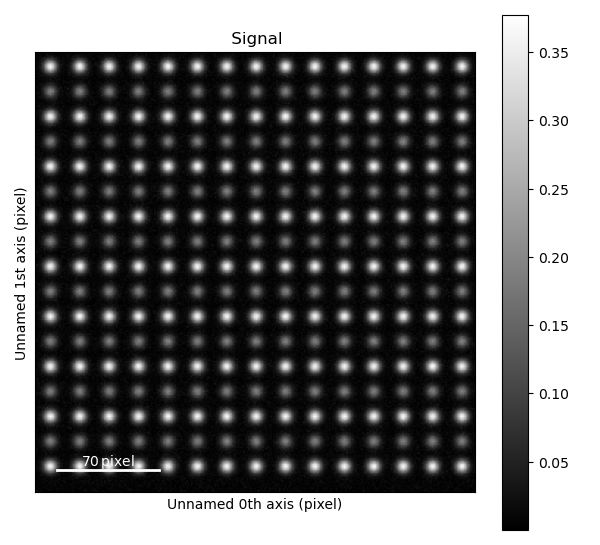

In [137]:
atom_lattice = am.Atom_Lattice(image=s.data, name='test', sublattice_list=[sublattice_A, sublattice_B])
atom_lattice.plot()

In [138]:
atom_lattice

<Atom_Lattice, test (sublattice(s): 2)>

Podemos extraer la sublattice que mas nos interes

In [205]:
atom_lattice.get_sublattice(2)

IndexError: list index out of range